<div style="text-align:center"> <h1> Taller 4. Series de Tiempo - Transformadas de Fourier </h2> </div>

In [409]:
# Librerias importadas para el desarrollo del taller
%pylab inline
from random import randint, uniform, random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import string
import matplotlib.cm as cm
import os
import matplotlib.gridspec as gridspec
import signal
from scipy import ndimage

Populating the interactive namespace from numpy and matplotlib


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['randint', 'uniform', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<div style="text-align:center"><b><h2>12.1 Basics of Fourier Series and the Fourier transform</h2></b> 

<div style="text-align:center"> <h3> Ejemplo 1 </h3> </div>

In [410]:
L=20 # define the computational domain [-L/2,L/2]
n=128 # define the number of Fourier modes 2^n
x2= np.linspace(-L/2,L/2,n+1) #define the domain discretization
x=x2[:n] # consider only the first n points: periodicity
u=exp(-x*x) # function to take a derivative of
ut= np.fft.fft(u); # FFT the function
utshift=np.fft.fftshift(ut); # shift FFT

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


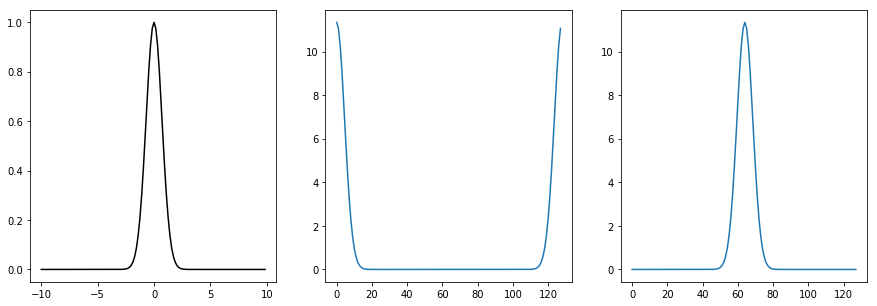

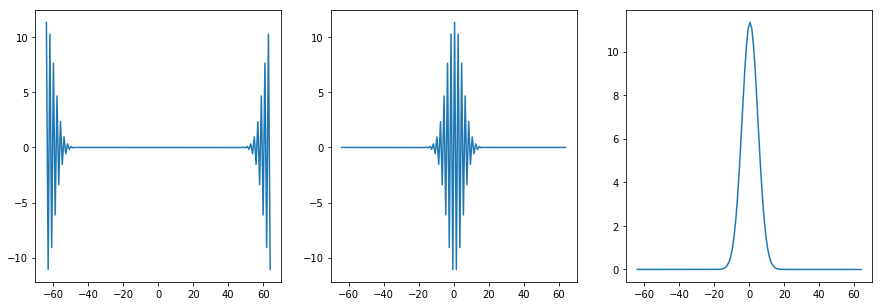

In [411]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig, axes1 = plt.subplots(1, 3, figsize=(15,5))
axes[0].plot(x, u, '-k') # plot initial gaussian
axes[1].plot(abs(ut)) # plot unshifted transform
axes[2].plot(abs(utshift)) # plot shifted transform
axes1[0].plot((linspace(-n/2,n/2,n)), ut)
axes1[1].plot((linspace(-n/2,n/2,n)), utshift) # plot unshifted transform
axes1[2].plot((linspace(-n/2,n/2,n)), abs(utshift)) # plot shifted transforms

<div style="text-align:center"> <h3> Ejemplo 2 </h3> </div>

In [412]:
L=20 # define the computational domain [-L/2,L/2]
n=128 # define the number of Fourier modes 2^n
x2=linspace(-L/2,L/2,n+1) # define the domain discretization
x=x2[:n] # consider only the first n points: periodicity
dx=x[1]-x[0] # dx value needed for finite difference
u= (1/np.cosh(x)) # function to take a derivative of
ut=np.fft.fft(u); # FFT the function
k_1 = linspace(0,(n/2-1)*(2*np.pi/L),n/2)
k_2 = linspace((n/2-1)*(2*np.pi/L)*-1,0,n/2)
k = concatenate((k_1,k_2))
ut1= 1j*k*ut; # first derivative
ut2= -1*k*k*ut; # second derivative
u1 = np.fft.ifft(ut1).real
u2 = np.fft.ifft(ut2).real
u1exact=-1*(1/np.cosh(x))*tanh(x); # analytic first derivative
u2exact=(1/np.cosh(x))-2*(1/np.cosh(x))**3; # analytic second derivative

## 2nd-order accurate
ux = []
ux_1=(-3*u[0]+4*u[1]-u[2])/(2*dx)
ux.append(ux_1)
for j in range(1,n-1):
    ux_j=(u[j+1]-u[j-1])/(2*dx)
    ux.append(ux_j)
ux_f=(3*u[-1]-4*u[-2]+u[-3])/(2*dx)
ux.append(ux_f)

# Finite difference calculation of first derivative
# 4 th order
ux2 = []
ux2_1 = (-3*u[0]+4*u[1]-u[2])/(2*dx)
ux2.append(ux2_1)
ux2_2 = (-3*u[1]+4*u[2]-u[3])/(2*dx)
ux2.append(ux2_2)

for j in range(1,n-2):
    ux2_j = (-u[j+2]+8*u[j+1]-8*u[j-1]+u[j-2])/(12*dx);
    ux2.append(ux2_j)
ux2_f1 = (3*u[-2]-4*u[-3]+u[-4])/(2*dx);
ux2.append(ux2_f1)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


[-0.9376, -0.9374, 0.498487, 0.498488]

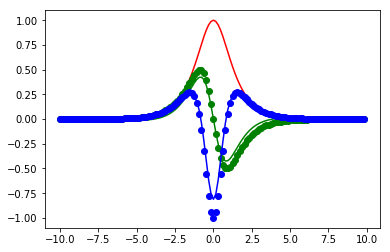

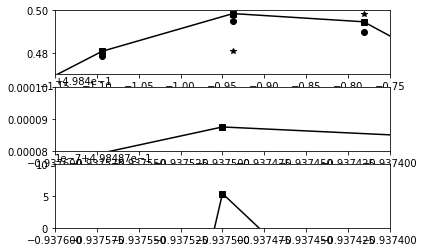

In [413]:
figure(1)
plot(x,u,'r',x,u1,'g',x,u1exact,'go',x,u2,'b',x,u2exact,'bo')
figure(2)
subplot(3,1,1), plot(x,u1exact,'ks-',x,u1,'k',x,ux,'ko',x,ux2,'k*')
axis([-1.15, -0.75, 0.47, 0.5])
subplot(3,1,2), plot(x,u1exact,'ks-',x,u1,'kv',x,ux,'ko',x,ux2,'k*')
axis([-0.9376, -0.9374, 0.49848, 0.49850])
subplot(3,1,3), plot(x,u1exact,'ks-',x,u1,'kv',x,ux,'ko',x,ux2,'k*')
axis([-0.9376, -0.9374, 0.498487, 0.498488])

<div style="text-align:center"><b><h2>12.2 FFT Application: Radar Detection and Filtering</h2></b> 



<div style="text-align:center"> <h3> Ejemplo 2 </h3> </div>

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


(0, 1.2)

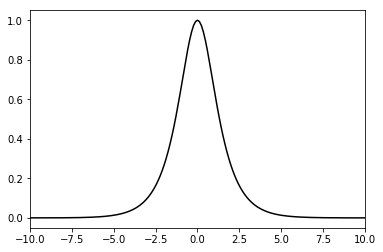

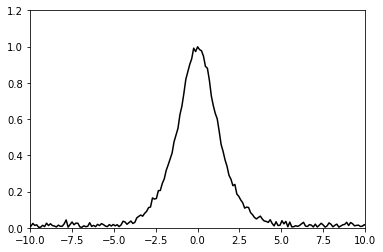

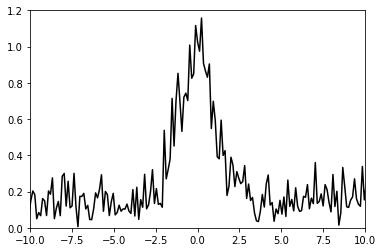

In [414]:
L=30 # time slot to transform
n=512 # number of Fourier modes 2^9
t2=linspace(-L,L,n+1); t=t2[0:n]; # time discretization
k_1 = linspace(0,(n/2-1)*(np.pi/L),n/2) 
k_2 = linspace((n/2)*(np.pi/L)*-1,-1,n/2)
k = concatenate((k_1,k_2)) # frequency components of FFT
u = 1/cosh(t)
figure(1)
xlim(xmax=10) # adjust the max leaving min unchanged
xlim(xmin=-10) # adjust the min leaving min unchanged
plot(t,u,'k')
noise = 1
noise_2 =10
ut=np.fft.fft(u)
unt=ut+noise*(np.random.rand(n)+(1j*np.random.rand(n)));
un = np.fft.ifft(unt)
figure(2), plot(t,abs(un),'k')
xlim(xmax=10) # adjust the max leaving min unchanged
xlim(xmin=-10) # adjust the min leaving min unchanged
ylim(ymax=1.2) # adjust the max leaving min unchanged
ylim(ymin=0) # adjust the min leaving min unchanged

untr=ut+noise_2*(np.random.rand(n)+(1j*np.random.rand(n)));
unr = np.fft.ifft(untr)
figure(3), plot(t,abs(unr),'k')

xlim(xmax=10) # adjust the max leaving min unchanged
xlim(xmin=-10) # adjust the min leaving min unchanged
ylim(ymax=1.2) # adjust the max leaving min unchanged
ylim(ymin=0) # adjust the min leaving min unchanged

In [415]:
noise_2 =10
ut=np.fft.fft(u)
untr=ut+(noise_2*(np.random.rand(n)+(1j*np.random.rand(n))));
unr = np.fft.ifft(untr)

Text(0,0.5,'$|ut|/max(|ut|)$')

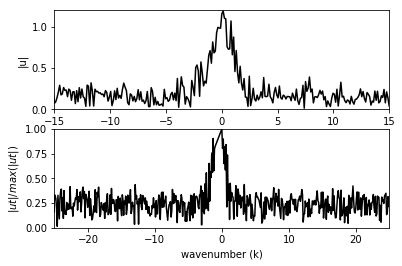

In [416]:
subplot(2,1,1), plot(t,abs(unr),'k')
axis([-15, 15, 0, 2])
xlabel('time (t)'), ylabel('|u|')
xlim(xmax=15) # adjust the max leaving min unchanged
xlim(xmin=-15) # adjust the min leaving min unchanged
ylim(ymax=1.2) # adjust the max leaving min unchanged
ylim(ymin=0) # adjust the min leaving min unchanged

subplot(2,1,2)
plot(np.fft.fftshift(k),abs(np.fft.fftshift(untr))/max(abs(np.fft.fftshift(untr))),'k')
axis([-25, 25, 0, 1])
xlabel('wavenumber (k)')
ylabel('$|ut|/max(|ut|)$')


In [417]:
filter=exp(-0.2*(k)**2)
unft = filter*utnr
unf=np.fft.ifft(unft)

#figure(1), plot(np.fft.fftshift(k),abs(unf)/max(abs(unf)),'r',np.fft.fftshift(k),abs(unr),'k' )
#axis([-30, 30, 0, 2])
#xlabel('wavenumber (k)'), ylabel('|u|')
#xlim(xmax=30) # adjust the max leaving min unchanged
#xlim(xmin=-30) # adjust the min leaving min unchanged
#ylim(ymax=1.1) # adjust the max leaving min unchanged
#ylim(ymin=0) # adjust the min leaving min unchanged

#figure(2), plot(np.fft.fftshift(k),np.fft.fftshift(unf),'b')
#axis([-25, 25, 0, 1])
#xlabel('wavenumber (k)')
#ylabel('$|ut|/max(|ut|)$')
#a=((t+1)/(t+1))*0.5
#figure(3), plot(np.fft.fftshift(k),(abs(np.fft.fftshift(unf))/max(abs(np.fft.fftshift(unf)))),'b', 
#               np.fft.fftshift(k), u, 'k', np.fft.fftshift(k), a, '--k' )
#axis([-25, 25, 0, 1])
#xlabel('time(t)')
#ylabel('$|ut|/max(|ut|)$')


In [418]:
filter=exp(-0.2*(k-20)**2)
unft1 = filter*utnr
unf1=np.fft.ifft(unft1)

#figure(1), plot(np.fft.fftshift(k),abs(unf)/max(abs(unf1)),'r',np.fft.fftshift(k),abs(unr),'k' )
#axis([-30, 30, 0, 2])
#xlabel('wavenumber (k)'), ylabel('|u|')
#xlim(xmax=30) # adjust the max leaving min unchanged
#xlim(xmin=-30) # adjust the min leaving min unchanged
#ylim(ymax=1.1) # adjust the max leaving min unchanged
#ylim(ymin=0) # adjust the min leaving min unchanged

#figure(2), plot(np.fft.fftshift(k),np.fft.fftshift(unf1)/max(np.fft.fftshift(unf1)),'b')
#axis([-25, 25, 0, 1])
#xlabel('wavenumber (k)')
#ylabel('$|ut|/max(|ut|)$')
#a=((t+1)/(t+1))*0.5
#figure(3), plot(np.fft.fftshift(k),abs(unf1)/max(abs(unf1)), 'r', np.fft.fftshift(k), a, '--k' )
#axis([-25, 25, 0, 1])
#xlabel('time(t)')
#ylabel('$|ut|/max(|ut|)$')


<div style="text-align:center"><b><h2>12.3 FFT Application: Radar Detection and Averaging</h2></b> 

In [419]:
L=30 # time slot to transform
n=512 # number of Fourier modes 2^9
t2=linspace(-L,L,n+1); t=t2[0:n]; # time discretization
k_1 = linspace(0,(n/2-1)*(np.pi/L),n/2) 
k_2 = linspace((n/2)*(np.pi/L)*-1,-1,n/2)
k = concatenate((k_1,k_2)) # frequency components of FFT
ks = np.fft.fftshift(k)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


Text(0.5,0,'frequency (k)')

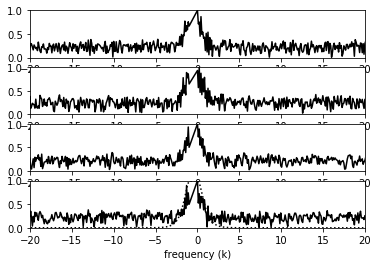

In [420]:
realize=[1, 2, 5, 100]
u = 1/cosh(t)
ut = np.fft.fft(u)
dat_js = []
for jj in range(len(realize)):
    ave=[]
    for i in range(realize[jj]):
        utn_j = ut+(noise_2*(np.random.rand(n)+(1j*np.random.rand(n))));
        ave.append(utn_j)
        dat_j=abs(fftshift(utn_j))/max(abs(utn_j))
        dat_js.append(dat_j)
        un_j = np.fft.ifft(utn_j)
    aves=abs(np.fft.fftshift(ave))/realize[jj];
    subplot(4,1,jj+1)
    plot(ks,(aves[0,:])/max(aves[0,:]),'k')
    axis([-20, 20, 0, 1])
plt.plot(ks,abs(fftshift(ut))/max(abs(fftshift(ut))),'k:')
xlabel('frequency (k)')

In [421]:
len((t+1)/(t+1))

512

(-30, 30)

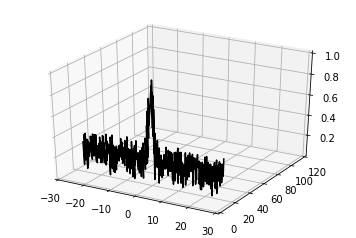

In [436]:
mc =(t+1)/(t+1)
y1=10*mc; y2=20*mc; y3=30*mc;y4=40*mc;y5=50*mc;y6=60*mc;y7=70*mc;y8=80*mc;
z1 = dat_js[0]; z2 = dat_js[1]; z3 = dat_js[2]; z4 = dat_js[3]; 
z5 = dat_js[4]; z6 = dat_js[5]; z7 = dat_js[7]; z8 = dat_js[8]; 
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(ks, y2, z2, '-k')
ax.set_ylim(0,120)

ax.set_xlim(-30,30)